# **Task 1 : Prediction using Regression**

**Author: Rosita Yuliana**

Here, Simple Linear Regression is used to predict the student scores based on the hours studied. Regression is the process of predicting a continuous value as opposed to predicting a categorical value in Classification.

First, we have to import all the libraries that we need in this notebook

In [ ]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

After that, we read the student scores data from link. By data.head(), we can see the dataset slightly.

In [ ]:
# Reading data from link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head(5)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


We can also check the data type, how many rows and columns in the datasets, and gain statistic information on the data. All these step is also called by **understanding data**.

In [ ]:
# checking data type
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [ ]:
# what if there are missing values in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
# checking data size
data.shape

(25, 2)

In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


From the information above, we can see that there are no duplicated data or missing values. Then, plot the dataset to see, if there is any relationship between the data. We can do scatter plot to see whether the data is has positive or negative relation. Positive relation means if the hours studied increase then the student scores also increase, its occurs opposite for the negative relation.

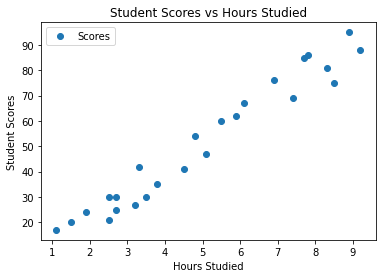

In [ ]:
# plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')
plt.title('Student Scores vs Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Student Scores')
plt.show()

From the graph above, we can see that there is postive linear relation between number of hours studied and student scores.

### **Preparing the data**

Now, we are ready to prepare the data. We have to divide the data into "attributes" (inputs) and "labels" (outputs).

In [ ]:
X = data.iloc[:, :-1].values  
Y = data.iloc[:, 1].values  

After that, by using Scikit-Learn's built-in train_test_split() method, we split the data into training and test sets.

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 

### **Training Algorithm**

We are already split the data into training and test sets, now its time for us to training our algorithm.

In [ ]:
from sklearn.linear_model import LinearRegression  
datareg = LinearRegression()  
datareg.fit(X_train, Y_train) 

print("Training complete")

Training complete


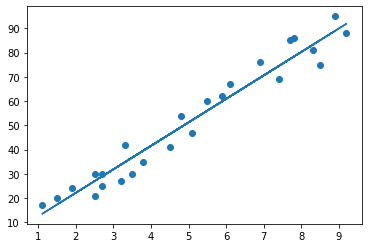

In [ ]:
# Plotting the regression line
line = datareg.coef_*X+datareg.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

### **Making Prediction**

Finally, we can make prediction of the model.

In [ ]:
print(X_test) # Testing data - In Hours
Y_pred = datareg.predict(X_test) # Predicting the scores

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [ ]:
# Comparing Actual vs Prediction
db= pd.DataFrame({'Actual': Y_test, 'Prediction': Y_pred})
db

,Actual,Prediction
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


Based on the table above, we can see the scores  between actual scores and prediction scores.

What if the student study for 9.25 hours/day? Then, what will be the predicted score?

In [ ]:
hours = 9.25
scpred = datareg.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(scpred[0]))

No of Hours = 9.25
Predicted Score = 92.38611528261494


So, if the student study for 9.25 hours/day then the score will be 92.38.

### **Evaluating The Model**

We have to evaluate the model to see how accurate the prediction. Here, evaluating the model by Mean Absolute Error and Mean Square Error.

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, Y_pred)) 

Mean Absolute Error: 3.9207511902099244


In [ ]:
from sklearn import metrics
metrics.r2_score(Y_test, Y_pred)

0.9678055545167994